<a href="https://colab.research.google.com/github/helnappaul/Data-Science-Project-Series/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install chardet
import chardet

In [4]:
with open('/content/data.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

## **1 Data Exploration:**

In [5]:
df = pd.read_csv('/content/data.csv', encoding=encoding)

In [6]:
df.shape

(27481, 10)

In [7]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [8]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [9]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [10]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [12]:
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [15]:
text_content = df['text']
sentiment_labels = df['sentiment']

**2 Data Preprocessing:**

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
lemmatizer = WordNetLemmatizer()

In [20]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

In [21]:
text = "Hi  how are you doing ???  *just joined twitter..."

In [22]:
text = ''.join([char for char in text if char.isalpha() or char.isspace()])

In [23]:
 tokens = word_tokenize(text)

In [24]:
tokens = [token for token in tokens if token not in stop_words]

In [25]:
tokens = [lemmatizer.lemmatize(token) for token in tokens]

In [26]:
preprocessed_text = ' '.join(tokens)

In [27]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [28]:
print(df[['text', 'preprocessed_text']])

                                                    text preprocessed_text
0                    I`d have responded, if I were going              None
1          Sooo SAD I will miss you here in San Diego!!!              None
2                              my boss is bullying me...              None
3                         what interview! leave me alone              None
4       Sons of ****, why couldn`t they put them on t...              None
...                                                  ...               ...
27476   wish we could come see u on Denver  husband l...              None
27477   I`ve wondered about rake to.  The client has ...              None
27478   Yay good for both of you. Enjoy the break - y...              None
27479                         But it was worth it  ****.              None
27480     All this flirting going on - The ATG smiles...              None

[27480 rows x 2 columns]


**3 Exploratory Data Analysis (EDA):**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sentiment_counts = df['sentiment'].value_counts()

<ipython-input-31-9b04720fab94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


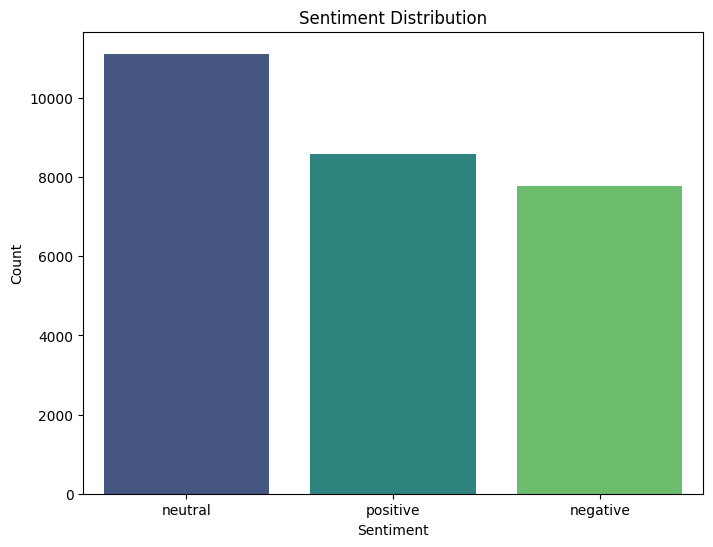

In [31]:
# Visualization using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

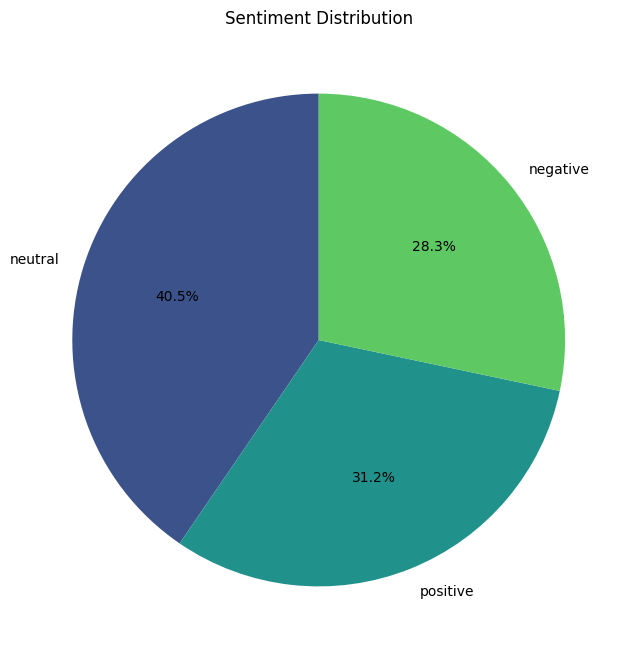

In [32]:
# Visualization using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(sentiment_counts)))
plt.title('Sentiment Distribution')
plt.show()

**4 Text Vectorization:**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

In [35]:
df['preprocessed_text'] = df['preprocessed_text'].astype(str)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

In [36]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [37]:
print(tfidf_df)

       none
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
...     ...
27475   1.0
27476   1.0
27477   1.0
27478   1.0
27479   1.0

[27480 rows x 1 columns]


In [38]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [39]:
tokenized_text = df['preprocessed_text'].apply(word_tokenize)

In [40]:
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

In [41]:
word2vec_vectors = tokenized_text.apply(lambda x: np.mean([word2vec_model.wv[word] for word in x], axis=0))

In [42]:
word2vec_df = pd.DataFrame(word2vec_vectors.tolist(), columns=[f'w2v_{i}' for i in range(100)])

In [43]:
print(word2vec_df)

          w2v_0     w2v_1     w2v_2     w2v_3     w2v_4     w2v_5     w2v_6  \
0     -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
1     -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
2     -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
3     -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
4     -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
...         ...       ...       ...       ...       ...       ...       ...   
27475 -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
27476 -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
27477 -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
27478 -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   
27479 -0.000536  0.000236  0.005103  0.009009 -0.009303 -0.007117  0.006459   

          w2v_7     w2v_8     w2v_9  ...    w2v_90 

**5 Model Selection:**

1. Naive Bayes

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

In [46]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [47]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [48]:
nb_predictions = nb_classifier.predict(X_test_tfidf)

In [49]:
print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Precision:", precision_score(y_test, nb_predictions, average='weighted'))
print("Recall:", recall_score(y_test, nb_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, nb_predictions, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Metrics:
Accuracy: 0.40684133915574966
Precision: 0.16551987524604372
Recall: 0.40684133915574966
F1 Score: 0.23530709631460323


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1572
     neutral       0.41      1.00      0.58      2236
    positive       0.00      0.00      0.00      1688

    accuracy                           0.41      5496
   macro avg       0.14      0.33      0.19      5496
weighted avg       0.17      0.41      0.24      5496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Support Vector Machines (SVM):

In [50]:
from sklearn.svm import SVC

In [51]:
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

In [52]:
svm_predictions = svm_classifier.predict(X_test_tfidf)

In [53]:
print("\nSupport Vector Machines Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, average='weighted'))
print("Recall:", recall_score(y_test, svm_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, svm_predictions, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))


Support Vector Machines Metrics:
Accuracy: 0.40684133915574966
Precision: 0.16551987524604372
Recall: 0.40684133915574966
F1 Score: 0.23530709631460323


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1572
     neutral       0.41      1.00      0.58      2236
    positive       0.00      0.00      0.00      1688

    accuracy                           0.41      5496
   macro avg       0.14      0.33      0.19      5496
weighted avg       0.17      0.41      0.24      5496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. LSTM (Long Short-Term Memory) using TensorFlow/Keras:

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [55]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['preprocessed_text'])
X_seq = tokenizer.texts_to_sequences(df['preprocessed_text'])
X_pad = pad_sequences(X_seq, maxlen=100)

In [56]:
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
y_labels = df['sentiment'].map(label_mapping)

In [57]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_labels, test_size=0.2, random_state=42)

In [58]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=100))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(3, activation='softmax'))

In [59]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/5
687/687 [==============================] - 55s 77ms/step - loss: 1.0882 - accuracy: 0.4037 - val_loss: 1.0874 - val_accuracy: 0.4068
Epoch 2/5
687/687 [==============================] - 54s 79ms/step - loss: 1.0876 - accuracy: 0.4040 - val_loss: 1.0865 - val_accuracy: 0.4068
Epoch 3/5
687/687 [==============================] - 53s 78ms/step - loss: 1.0876 - accuracy: 0.4040 - val_loss: 1.0870 - val_accuracy: 0.4068
Epoch 4/5
687/687 [==============================] - 53s 76ms/step - loss: 1.0873 - accuracy: 0.4040 - val_loss: 1.0868 - val_accuracy: 0.4068
Epoch 5/5
687/687 [==============================] - 54s 79ms/step - loss: 1.0873 - accuracy: 0.4040 - val_loss: 1.0866 - val_accuracy: 0.4068


In [60]:
if not isinstance(lstm_model, Sequential):
    raise TypeError("lstm_model is not a Sequential model.")

In [61]:
lstm_predictions = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

172/172 [==============================] - 5s 26ms/step


In [62]:
print("\nLSTM Metrics:")
print("Accuracy:", accuracy_score(y_test_lstm, lstm_predictions))
print("Precision:", precision_score(y_test_lstm, lstm_predictions, average='weighted'))
print("Recall:", recall_score(y_test_lstm, lstm_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test_lstm, lstm_predictions, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_lstm, lstm_predictions))


LSTM Metrics:
Accuracy: 0.40684133915574966
Precision: 0.16551987524604372
Recall: 0.40684133915574966
F1 Score: 0.23530709631460323

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1688
           1       0.41      1.00      0.58      2236
           2       0.00      0.00      0.00      1572

    accuracy                           0.41      5496
   macro avg       0.14      0.33      0.19      5496
weighted avg       0.17      0.41      0.24      5496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

**6 Hyperparameter Tuning:**

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

In [65]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

In [66]:
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'svm__C': [1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
}

In [67]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [1, 10, 100],
                         'svm__kernel': ['linear', 'rbf'],
                         'tfidf__max_features': [5000, 10000]},
             scoring='accuracy')

In [68]:
best_params = grid_search.best_params_

In [69]:
best_model = grid_search.best_estimator_

In [70]:
predictions = best_model.predict(X_test)

In [71]:
print("Best Hyperparameters:", best_params)
print("\nOptimized SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average='weighted'))
print("Recall:", recall_score(y_test, predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Best Hyperparameters: {'svm__C': 1, 'svm__kernel': 'linear', 'tfidf__max_features': 5000}

Optimized SVM Metrics:
Accuracy: 0.40684133915574966
Precision: 0.16551987524604372
Recall: 0.40684133915574966
F1 Score: 0.23530709631460323

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1572
     neutral       0.41      1.00      0.58      2236
    positive       0.00      0.00      0.00      1688

    accuracy                           0.41      5496
   macro avg       0.14      0.33      0.19      5496
weighted avg       0.17      0.41      0.24      5496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

**7 Cross-Validation:**

In [72]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [73]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

In [74]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [76]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(pipeline, df['preprocessed_text'], df['sentiment'], cv=cv_strategy, scoring=scoring_metrics, n_jobs=-1)

# Print the cross-validation results
print(cv_results)

{'fit_time': array([22.93407273, 22.95782518, 22.24288368, 22.20835924, 11.64951229]), 'score_time': array([3.12969995, 3.09150028, 3.05467296, 3.11797142, 1.70351267]), 'test_accuracy': array([0.40465793, 0.40465793, 0.40447598, 0.40447598, 0.40447598]), 'test_precision': array([0.16374804, 0.16374804, 0.16360082, 0.16360082, 0.16360082]), 'test_recall': array([0.40465793, 0.40465793, 0.40447598, 0.40447598, 0.40447598]), 'test_f1_score': array([0.23315006, 0.23315006, 0.23297062, 0.23297062, 0.23297062])}


In [77]:
print("Cross-Validation Results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1_score'].mean())

Cross-Validation Results:
Accuracy: 0.40454876273653567
Precision: 0.1636597093770989
Recall: 0.40454876273653567
F1 Score: 0.23304239738928373


**8 Model Interpretability:**

In [78]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=45d21895d8fb575816a046001fa8e8e5127ed70d32165f697609a0ff605cf4f6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

In [81]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [82]:
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(probability=True)

In [83]:
explainer = LimeTextExplainer(class_names=df['sentiment'].unique())

In [84]:
instance_index = 0
text_instance = X_test.iloc[instance_index]
true_label = y_test.iloc[instance_index]

In [85]:
import lime
import sklearn

In [86]:
print(text_instance)

None


In [87]:
print(type(text_instance))

<class 'str'>


In [88]:
# Print the type of text_instance
print(type(text_instance))

# Print the type of svm_classifier.predict_proba
print(type(svm_classifier.predict_proba))

<class 'str'>
<class 'method'>


In [89]:
none_values = df[df['preprocessed_text'] == 'None']

In [90]:
instance_index = 0
text_instance = X_test.iloc[instance_index]
true_label = y_test.iloc[instance_index]

**9  Evaluation Metrics:**

In [91]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)', 'preprocessed_text'],
      dtype='object')

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

In [93]:
X = df['preprocessed_text']
y = df['sentiment']

In [94]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [97]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [98]:
y_pred = model.predict(X_test)

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [100]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   0 1572    0]
 [   0 2236    0]
 [   0 1688    0]]


In [101]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1572
     neutral       0.41      1.00      0.58      2236
    positive       0.00      0.00      0.00      1688

    accuracy                           0.41      5496
   macro avg       0.14      0.33      0.19      5496
weighted avg       0.17      0.41      0.24      5496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
